In [72]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import typing as tp
#sns.set_palette("Set2")

%matplotlib inline



Пусть нам попались какие-то данные.

В данном случае - 100 различных значений какой-то величины.

In [2]:
size = 100
sample = sps.norm.rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

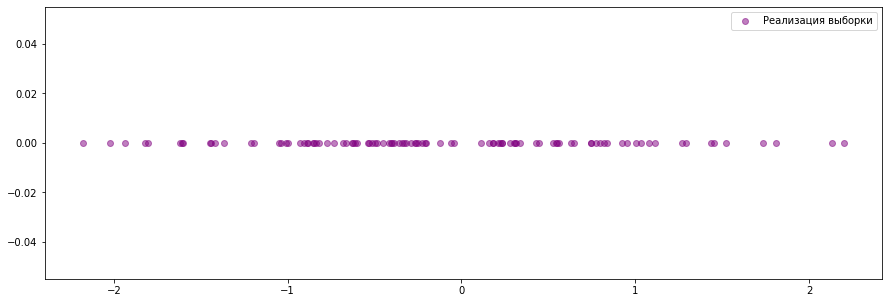

In [3]:
# рисуем график
# по оси x - значения реализаций случайной величины

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()
plt.show()

Для начала давайте попробуем прикинуть, как распределены данные:

## Гистограмма

Идея: разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

Формально: $X_1, \ldots X_n$ - выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ - разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ - количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки matplotlib.

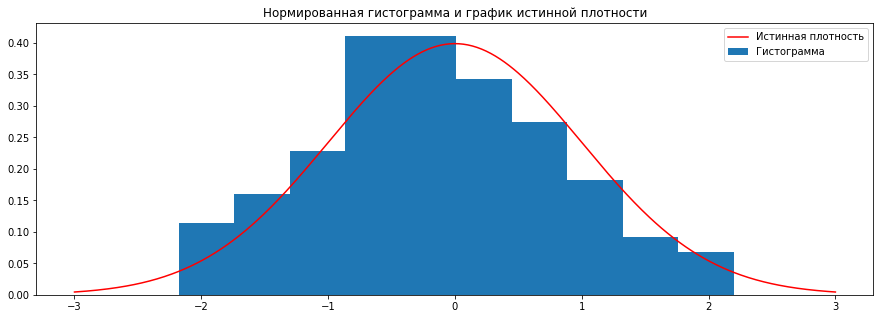

In [146]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма") 
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1

grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Другой способ:

Для построения гистограммы удобно использовать библиотеку seaborn (подробнее - в туториалах).

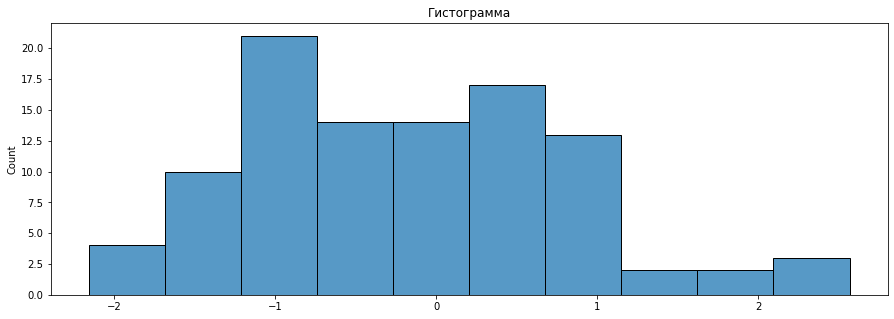

In [5]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Посмотрим, на что влияет количество корзин.

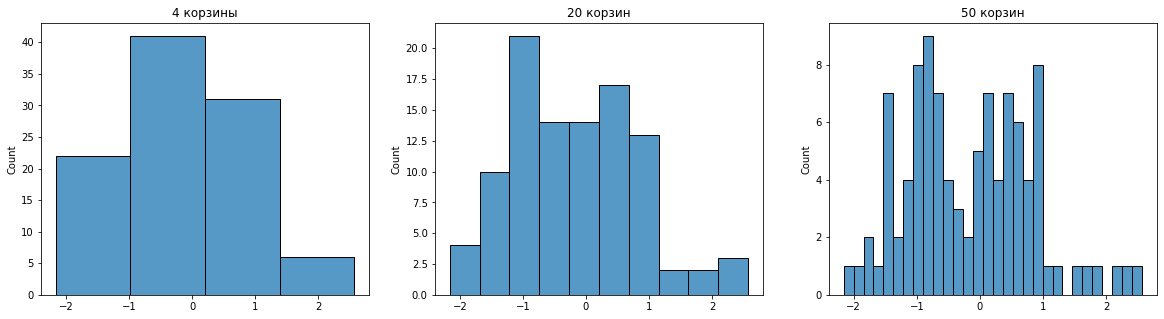

In [6]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )


sns.histplot(data=sample, bins = 4, ax=axs[0])
sns.histplot(data=sample, bins = 10, ax=axs[1])
sns.histplot(data=sample, bins = 30, ax=axs[2])


#data - наши данные, bins - количество корзин

plt.show()

## Задание 1
Рассмотрим функцию `np.random.randint()`.

Выберите любые значения a и b и создайте массив рандомных чисел от a до b (размер массива 100).

In [30]:
left, right, sampleLength = 0, 20, 100
uniformDistributedIntValues = np.random.randint(left, right, sampleLength)

Постройте гистограмму для этого массива.

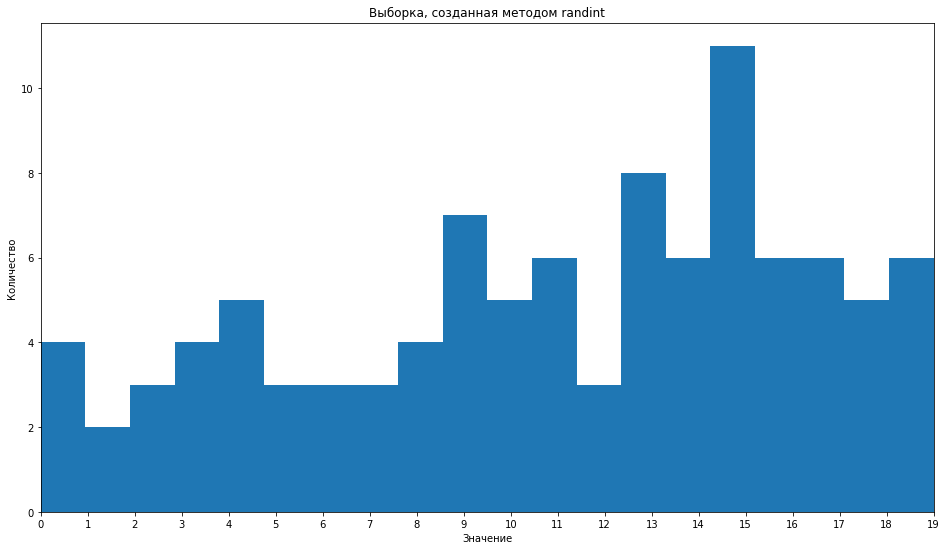

In [31]:
fig, ax = plt.subplots(figsize = (16,9))

plt.xticks(np.arange(left, right, 1))
plt.xlim((left,right - 1))
plt.title("Выборка, созданная методом randint")
plt.xlabel("Значение")
plt.ylabel("Количество")
plt.hist(uniformDistributedIntValues, bins = 20);

Постройте более четкий график, увеличив параметр `bins`.

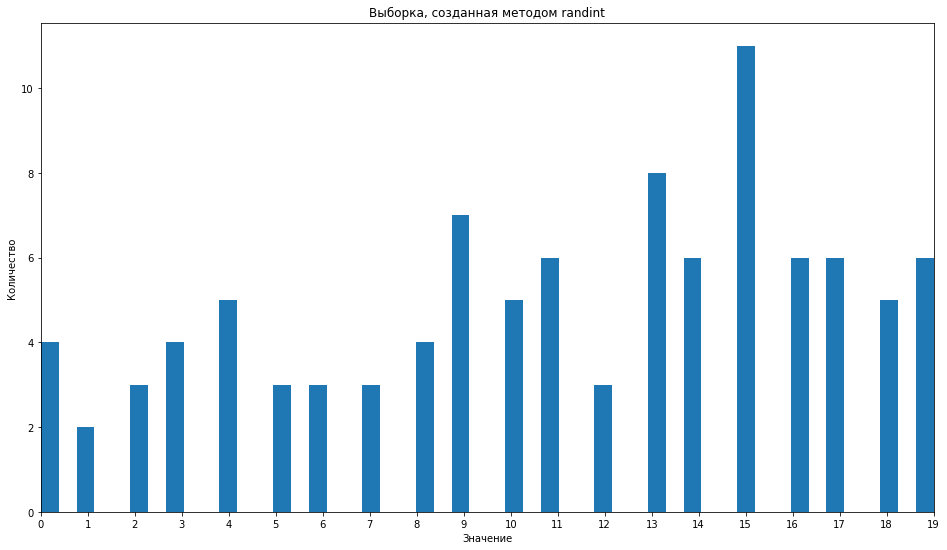

In [32]:
fig, ax = plt.subplots(figsize = (16,9))

plt.xticks(np.arange(left, right, 1))
plt.xlim((left,right - 1))
plt.title("Выборка, созданная методом randint")
plt.xlabel("Значение")
plt.ylabel("Количество")
plt.hist(uniformDistributedIntValues, bins = 50);

Создайте массив sizes, который будет сосстоять из 1e2, 1e3, 1e4, 1e5 (используйте `np.logspace()`). Числа должны быть целыми.

In [33]:
sizes = np.logspace(2, 5, 4).astype(np.int64)

Постройте plt.subplots в виде строки из 4 графиков. Параметр `bins` укажите 100. На каждом графике отрисуйте гистограмму массива заданного размера из массива sizes. Подпишите, какой размер массивы к какому графику относится.

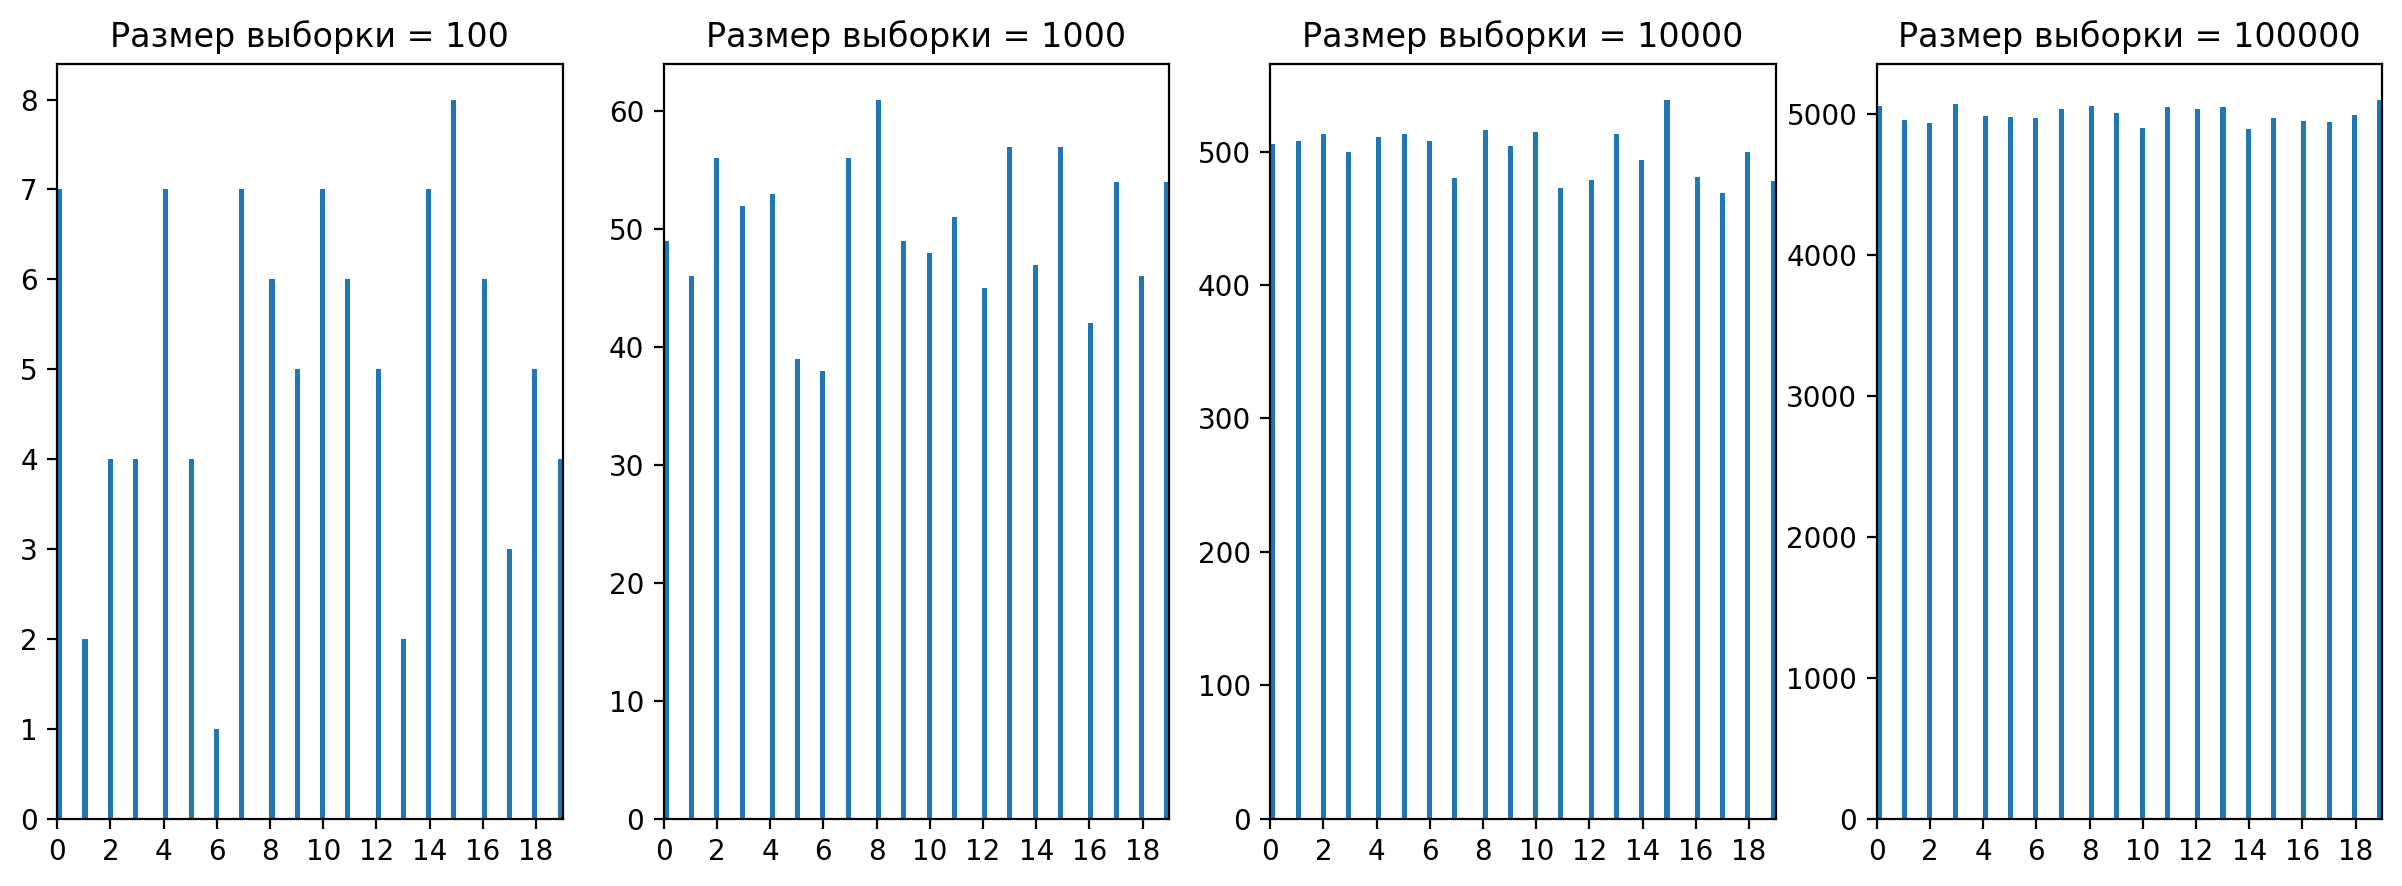

In [42]:
fig, ax = plt.subplots(1, 4, figsize = (15,5), dpi = 200)

for i,size in enumerate(sizes):
    ax[i].hist(np.random.randint(left, right, size),
               bins = 100)
    ax[i].set_title(f'Размер выборки = {size}')
    ax[i].set_xlim((left, right-1))
    ax[i].set_xticks(np.arange(left, right, 2))

На какое распределение похоже?

Распределение похоже на равномерное, это хорошо заметно на крайнем правом графике. Согласно документации numpy: *Return random integers from the “discrete uniform” distribution*. То есть метод, действительно возвращает значения равномерно распределенной, дискретной случайной величины.

## Задание 2*
Напишите собственную реализацию нормального распределения. Создайте класс и определите в нем функцию _pdf. Напомню, что плотность нормального распределения расчитывается следующим образом:
$$ \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$
Для построения функции возьмите $\mu$ = 0, $\sigma$ = 1


##### Описание алгоритма(взято из [статьи](https://habr.com/ru/post/208684/))

Факт 1: 

Распределение суммы квадратов двух независимых нормальных случайных величин есть экспоненциальное распределение:

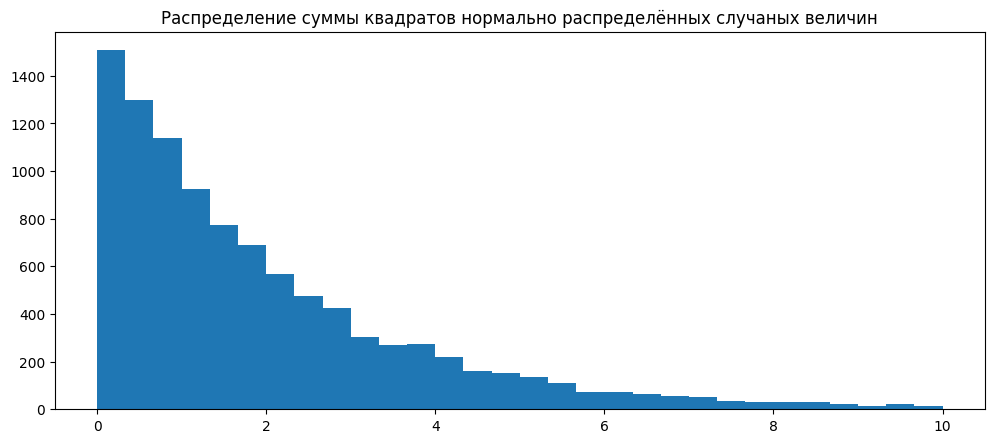

In [50]:
sampleLength = 10000

fig, ax = plt.subplots(figsize = (12,5), dpi = 100)
plt.title("Распределение суммы квадратов нормально распределённых случаных величин")
plt.hist(sps.norm.rvs(size = sampleLength)**2 + sps.norm.rvs(size = sampleLength)**2,
         bins = 30,
         range = (0, 10));

В скором времени, мы поймём, что получить экспоненциальное распределение - несложная задача. Идея алгоритма заключается в получении нормального распределения из экспоненциального и равномерного.

Ранее описанный факт можно интерпретировать следущим образом: **Если на графике нарисовать точки, координаты которой соответсвуют нормальному распределению, то случайная величина, соответствующая квадрату радиус вектора точки будет распределена экспоненциально**. 

То есть *координаты точек в декартовой системе распределены нормально, а в полярной - экспоненциально($r^{2}$) и равномерно ($\phi$)*:

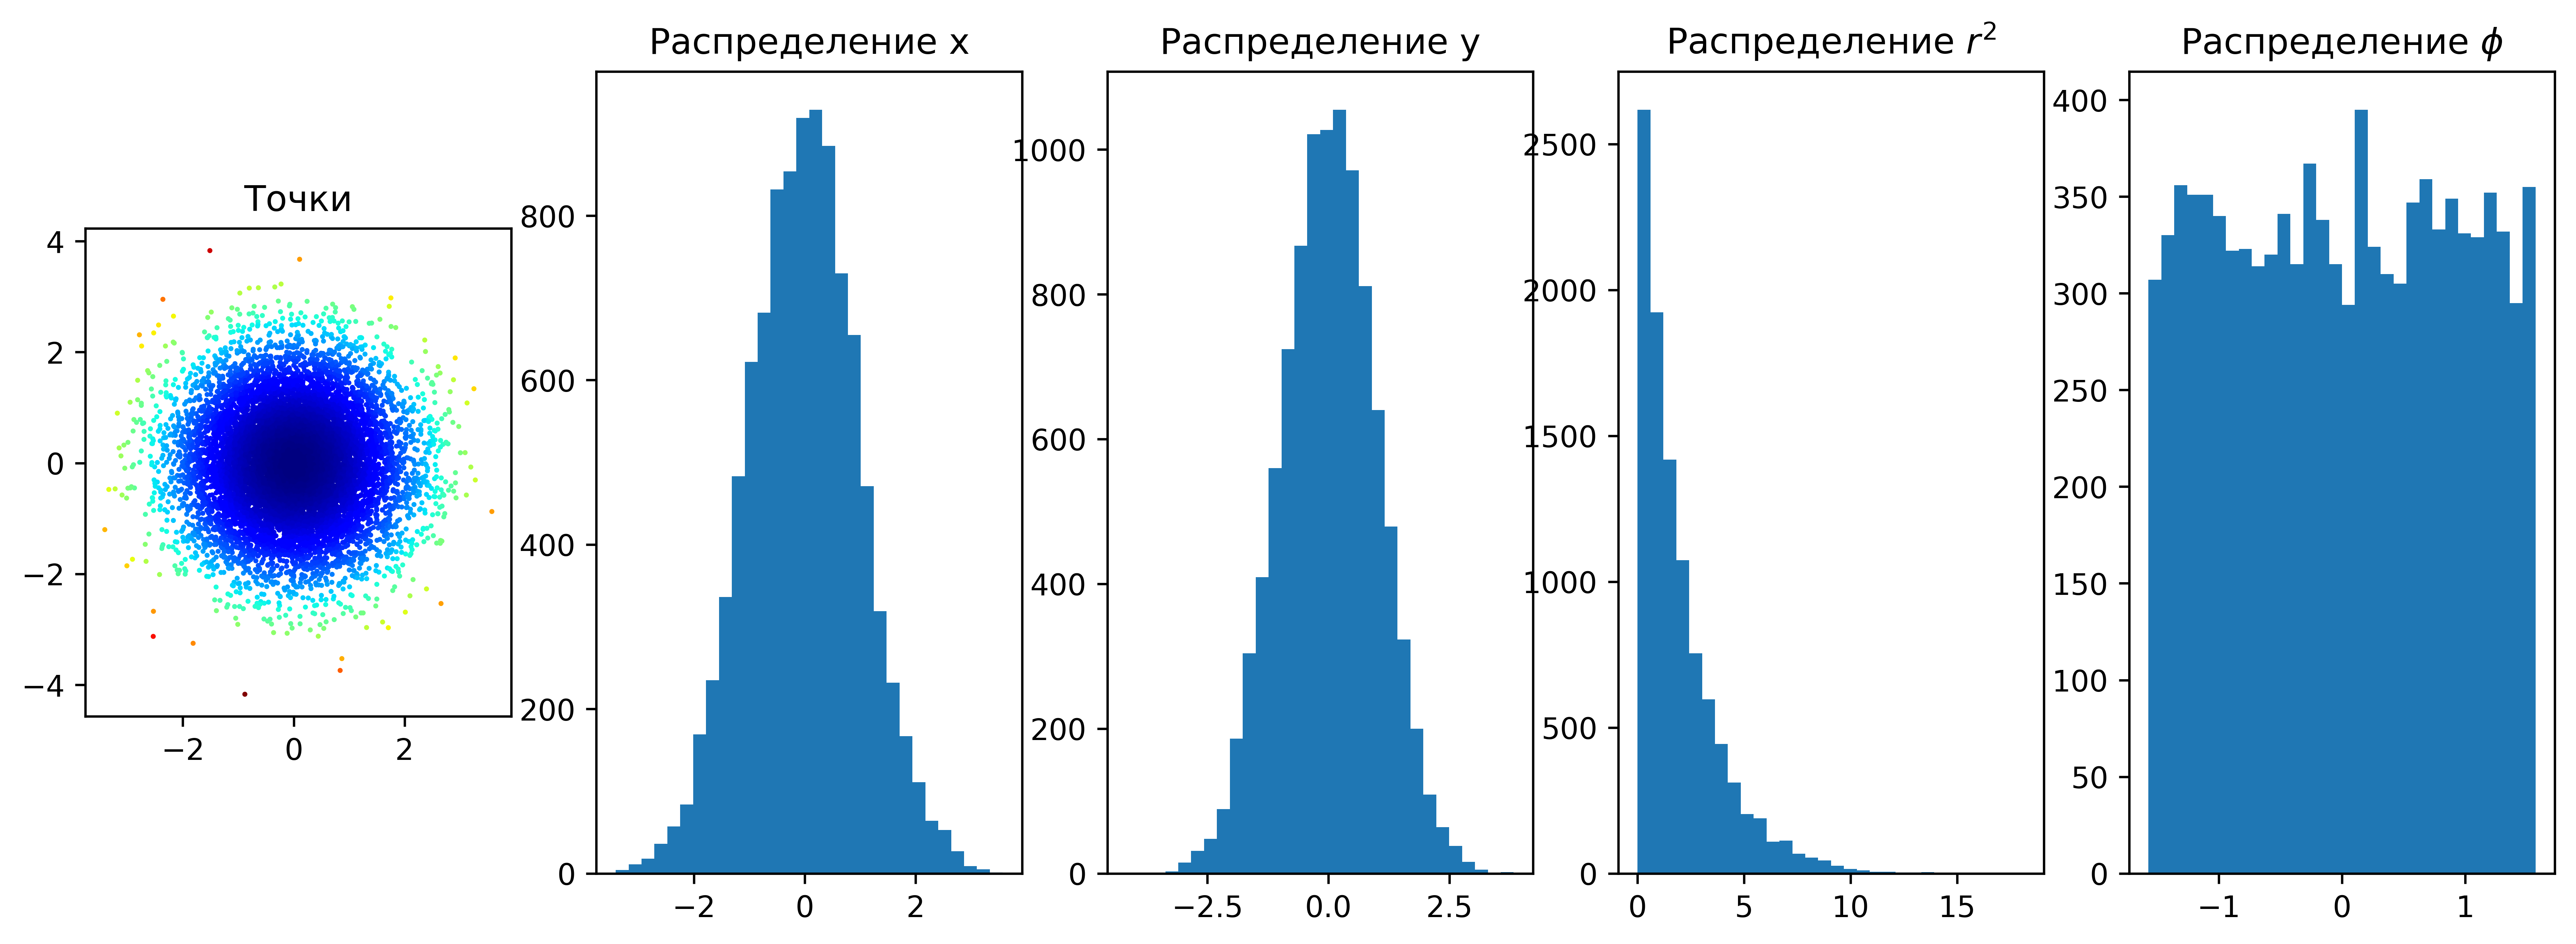

In [67]:
x, y = sps.norm.rvs(size = sampleLength), sps.norm.rvs(size = sampleLength)
rSq, phi = x**2 + y**2, np.arctan(y/x)
fig, ax = plt.subplots(1,5,figsize = (15,5), dpi = 600)

ax[0].scatter(x, y, s = 0.5, c = rSq, cmap = 'jet')
ax[0].set_title("Точки")
ax[0].set_aspect('equal')

ax[1].hist(x, bins = 30)
ax[1].set_title("Распределение x")

ax[2].hist(y, bins = 30)
ax[2].set_title("Распределение y")

ax[3].hist(rSq, bins = 30)
ax[3].set_title("Распределение $r^{2}$")

ax[4].hist(phi, bins = 30)
ax[4].set_title("Распределение $\phi$");


Теперь видно, что для получения двух независимых, нормально распределенных случаных величин, достаточно сгенрировать случйную величину, распределенную экспоненциально(наш квадрат радиуса), и равномерную случайную величину(наш угол $\phi$).

Затем переходим из полярной системы в декартову. Так и получаются формулы:

$$
\begin{aligned}
 X=\sqrt{-2 \ln v} \cdot \cos (2 \pi u) \\
 Y=\sqrt{-2 \ln v} \cdot \sin (2 \pi u) \\
, где \ u \sim R(0,1), v \sim R(0,1)
\end{aligned}
$$

##### Проверка алгоритма

In [127]:
def getNormallyDistributedRandomValues(shape: tp.Union[int, tuple], loc: float = 0, scale: float = 1) -> np.ndarray:
    if type(shape) is tuple:
        return np.sqrt(-2*np.log(np.random.rand(*shape))) * np.cos(2*np.pi*np.random.rand(*shape)) * scale + loc
    return np.sqrt(-2*np.log(np.random.rand(shape))) * np.cos(2*np.pi*np.random.rand(shape)) * scale + loc

Сгенерируйте выборку из 2000 элементов. Засеките время генерации выборки.

In [102]:
%%timeit
normValues = getNormallyDistributedRandomValues((2000,20))

1.86 ms ± 33.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [101]:
%%timeit
normValuesSps = sps.norm.rvs(size = (2000,20))

1.69 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
%%timeit
normValues = getNormallyDistributedRandomValues(2000)

107 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [106]:
%%timeit
normValuesSps = sps.norm.rvs(size = 2000)

107 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [111]:
normValuesSps = sps.norm.rvs(size = 10000)
normValues = getNormallyDistributedRandomValues(10000)

Постройте гистограмму для вашей выборки

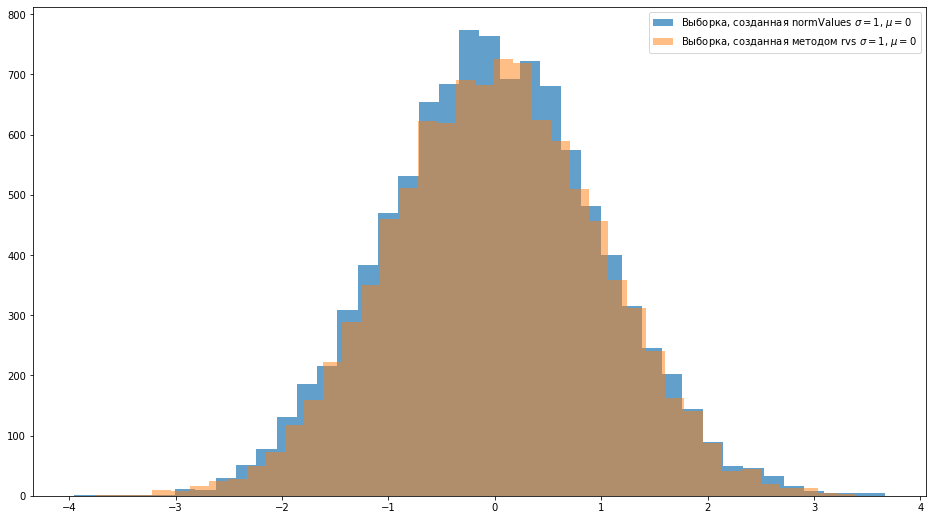

In [116]:
fig, ax = plt.subplots(figsize = (16,9))
plt.hist(normValues, 
         bins = 40, 
         label = r'Выборка, созданная normValues $\sigma = {}$, $\mu = {}$'.format(1,0),
         alpha = 0.7)
plt.hist(normValuesSps,
         bins = 40,
         label = r'Выборка, созданная методом rvs $\sigma = {}$, $\mu = {}$'.format(1,0),
         alpha = 0.5);
plt.legend();

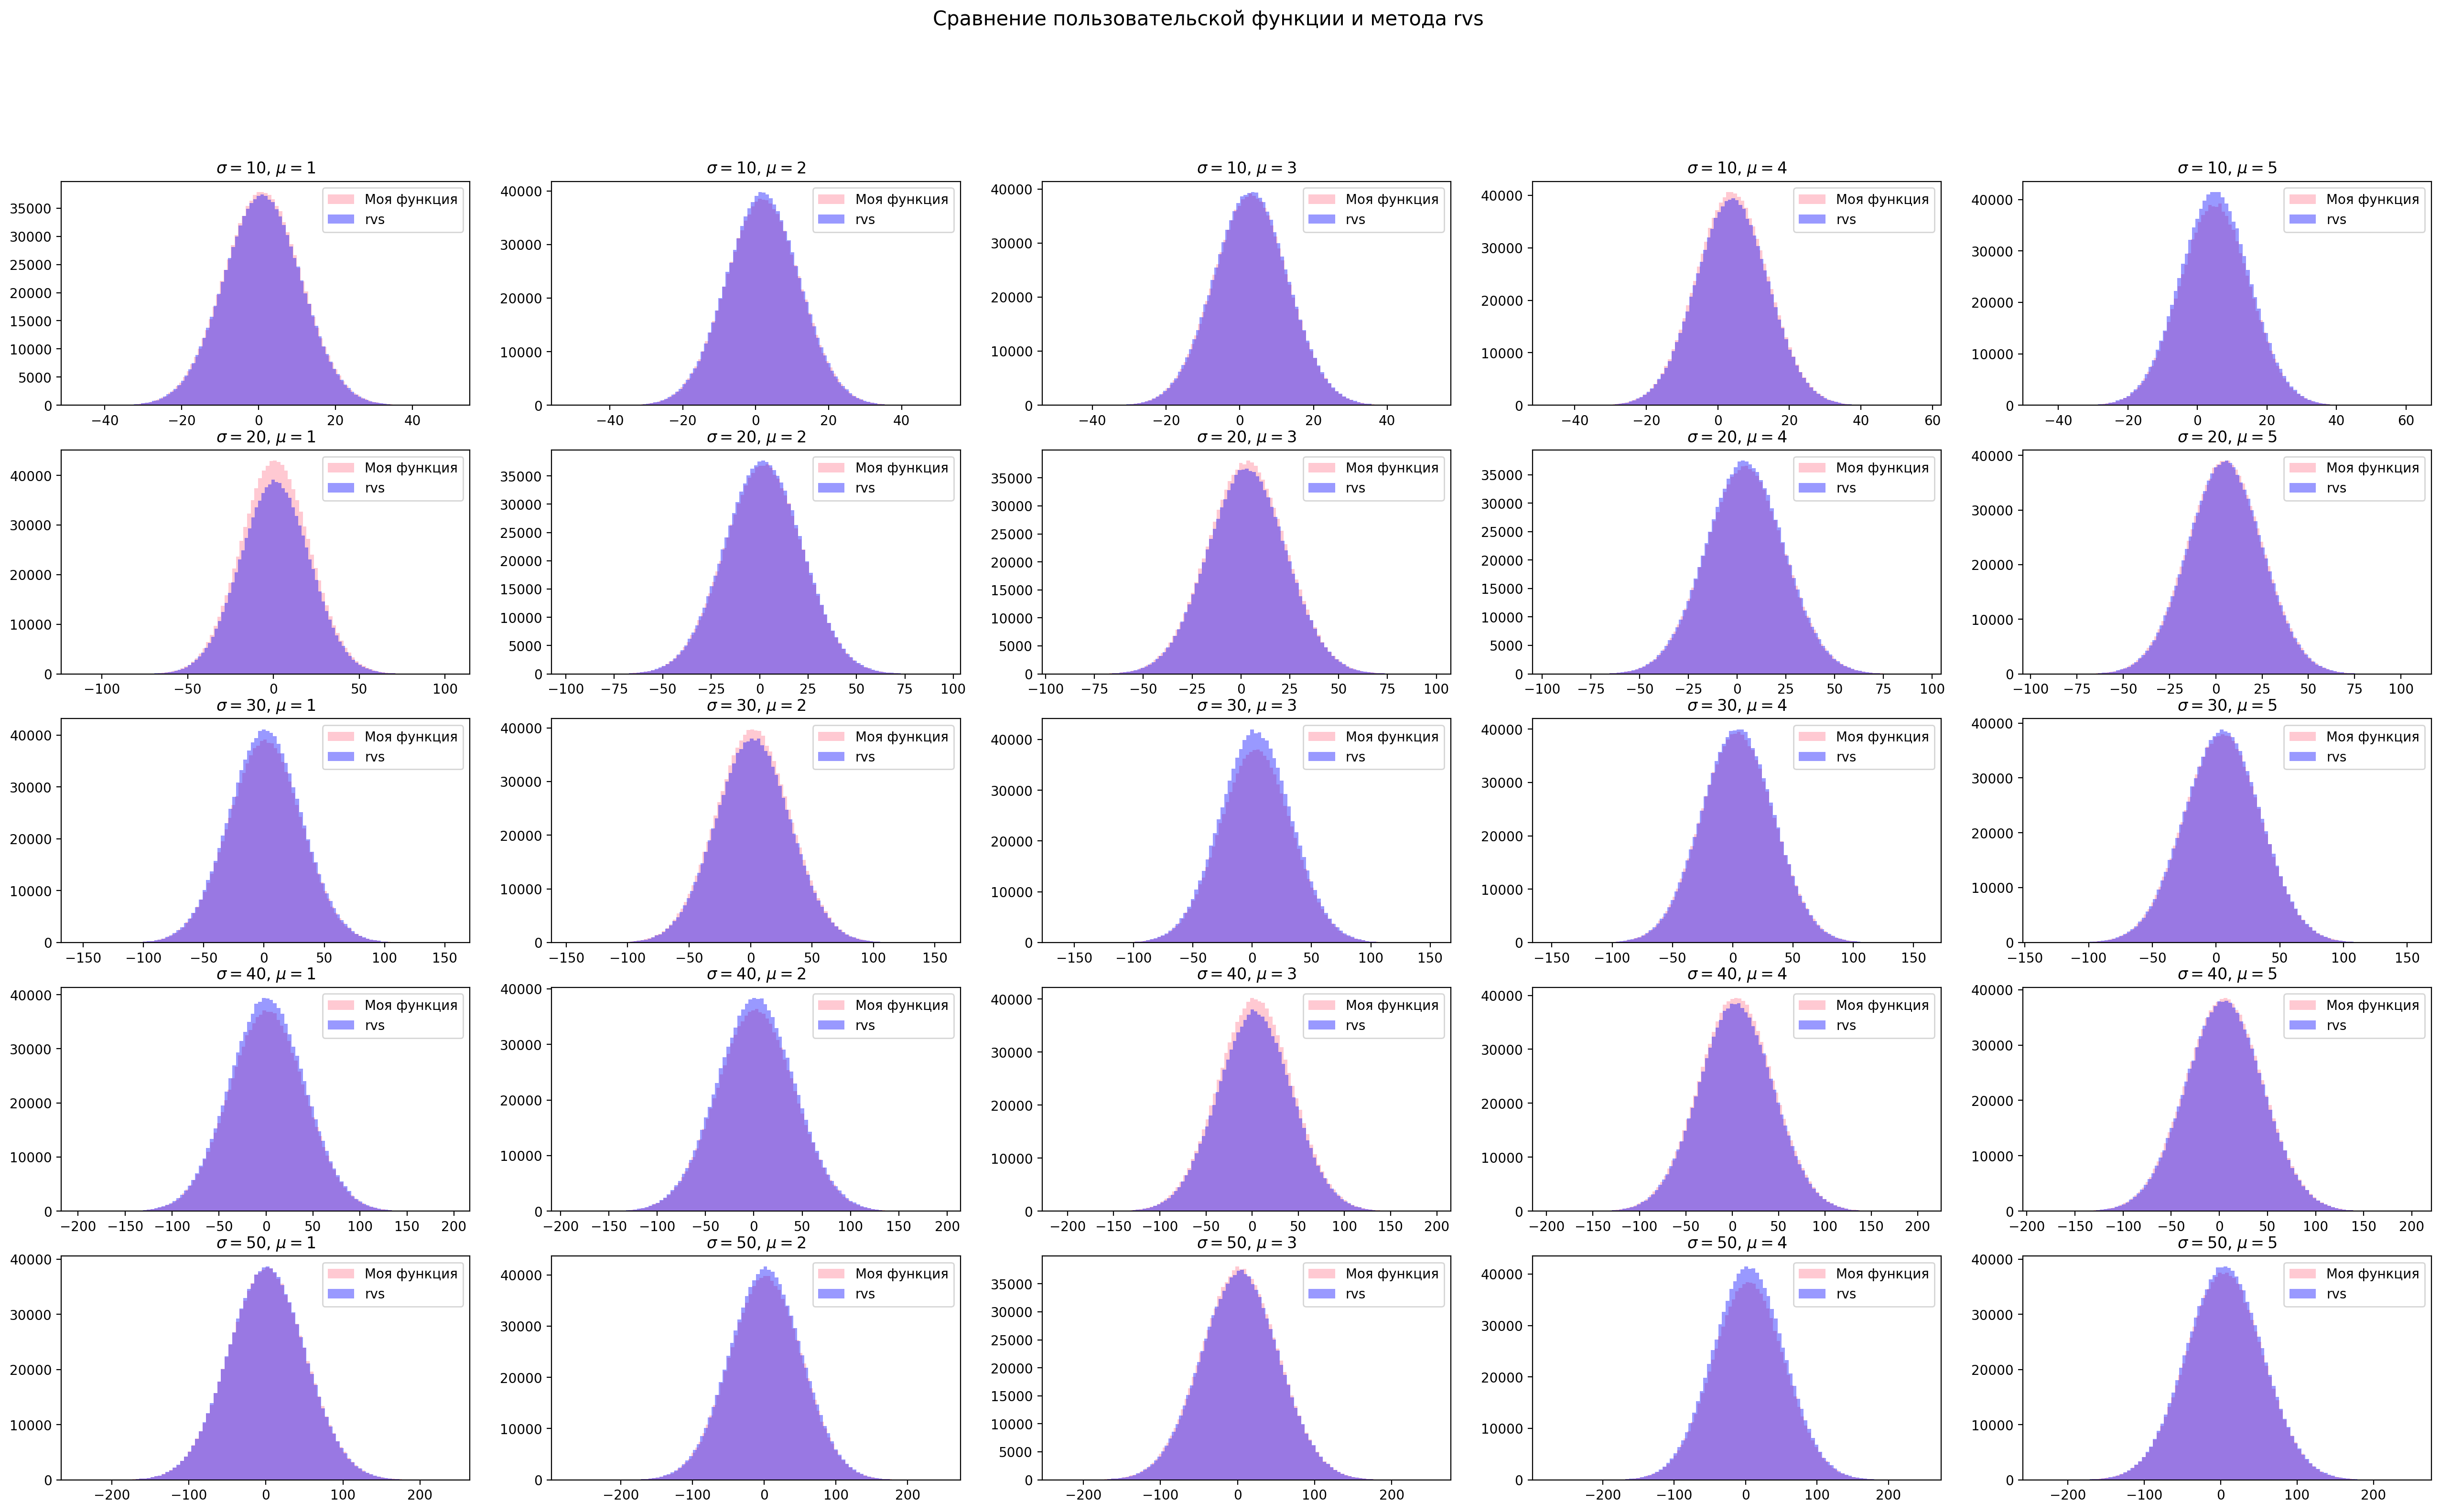

In [140]:
scaleValues, locValues = (np.arange(5)+1)*10, (np.arange(5)+1)

fig, ax = plt.subplots(5, 5, figsize = (32,18), dpi = 200)
for i, scale in enumerate(scaleValues):
    for j, loc in enumerate(locValues):
        ax[i,j].hist(getNormallyDistributedRandomValues(int(1e6), scale = scale, loc = loc), 
                    bins = 100, 
                    label = 'Моя функция',
                    alpha = 0.85,
                    color = 'pink')
        ax[i,j].hist(sps.norm.rvs(size = int(1e6), scale = scale, loc = loc), 
                    bins = 100, 
                    label = 'rvs',
                    alpha = 0.4,
                    color = 'blue')
        ax[i,j].set_title(r'$\sigma = {}$, $\mu = {}$'.format(scale,loc))
        ax[i,j].legend()
fig.suptitle('Сравнение пользовательской функции и метода rvs', fontsize = 15);


Как, используя вашу функцию, можно создавать выборки для других значений $\mu$ и $\sigma$? Проиллюстрируйте.

## Ядерная оценка плотности

KDE (kernel density estimation) - непараметричсекий способ оценивания случайной величины.

In [147]:
size = len(sample)

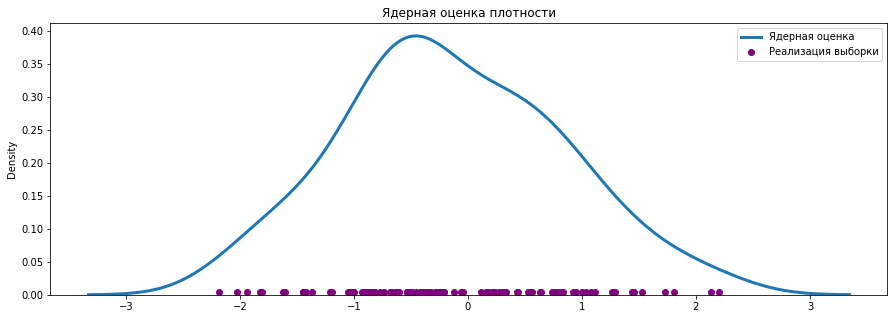

In [148]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()


Сравним график ядерной оценки с графиком истинной плотности.

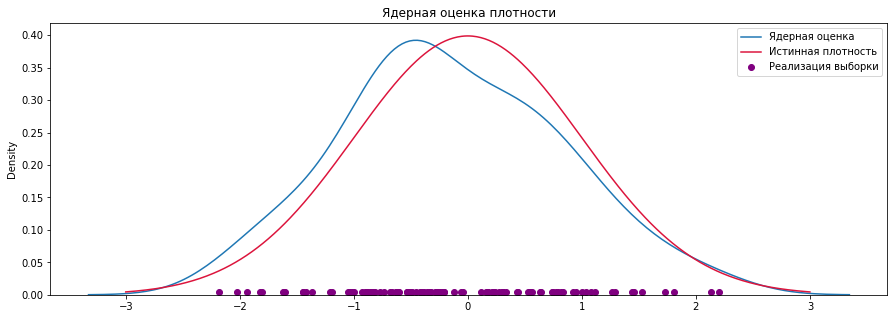

In [149]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), color='crimson', label='Истинная плотность')


plt.legend()
plt.show()

Также метод histplot позволяет сразу строить и гистограмму, и ядерную оценку плотности.

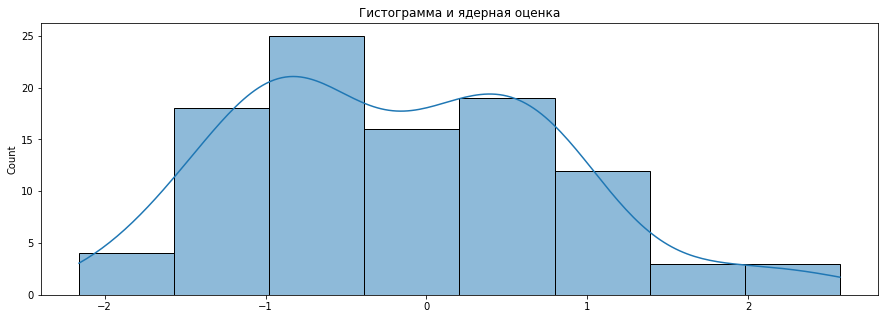

In [9]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

## Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [10]:
size = 1000
sample = sps.norm(loc=3, scale=5).rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

Посчитаем выборочное среднее

In [11]:
mean = sample.sum() / size

print("Выборочное среднее:", mean)

Выборочное среднее: 2.729321966255051


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

Посчитаем выборочное среднее по всем префиксам выборки ($j \in {1, \ldots n}$):

$(\overline{X} )_j = \sum\limits_{i=1}^j X_i$

In [12]:
means = sample.cumsum() / (np.arange(size) + 1)

Построим график зависимости среднего от размера префикса:

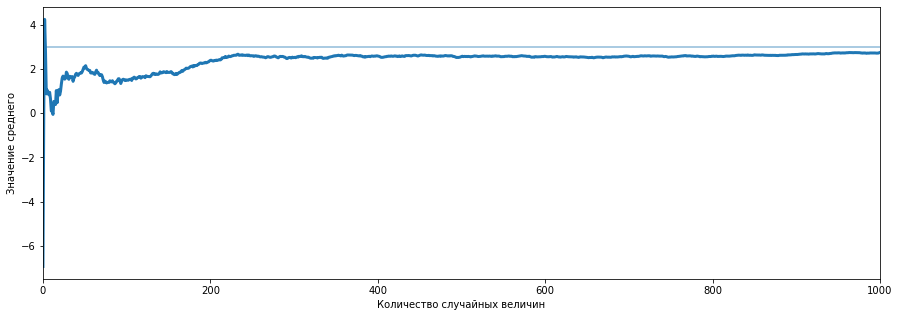

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

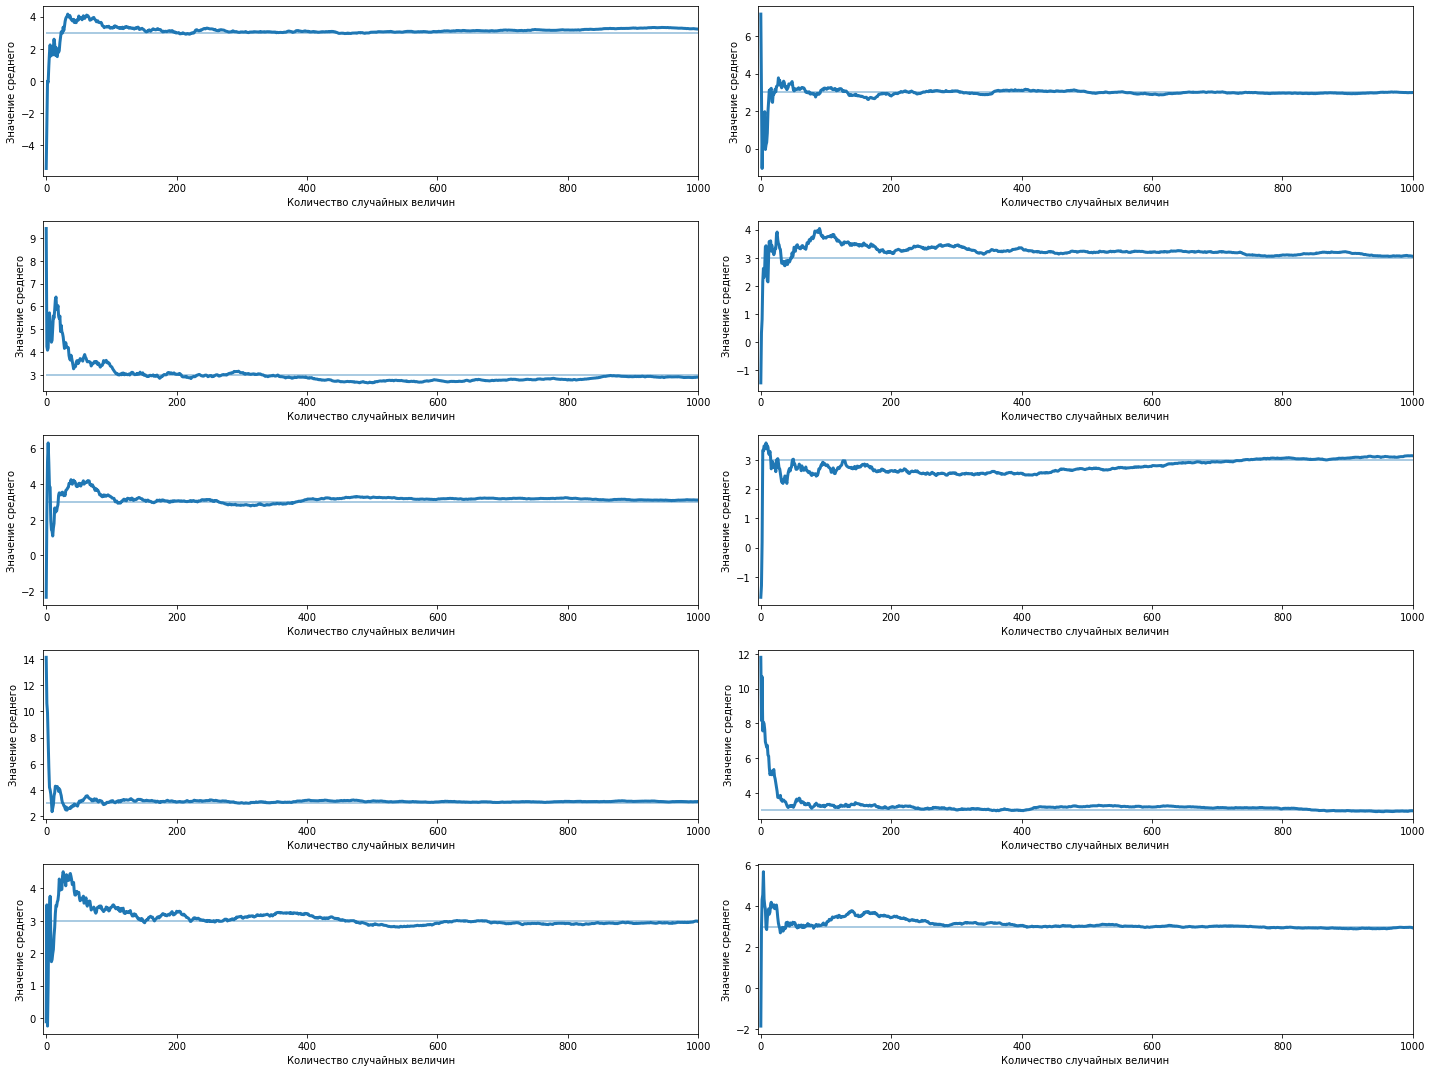

In [14]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

## Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.







In [15]:
size = 1000
samples_count = 500

sample = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

Нарисуем траектории среднего для всех реализациий на одном графике.

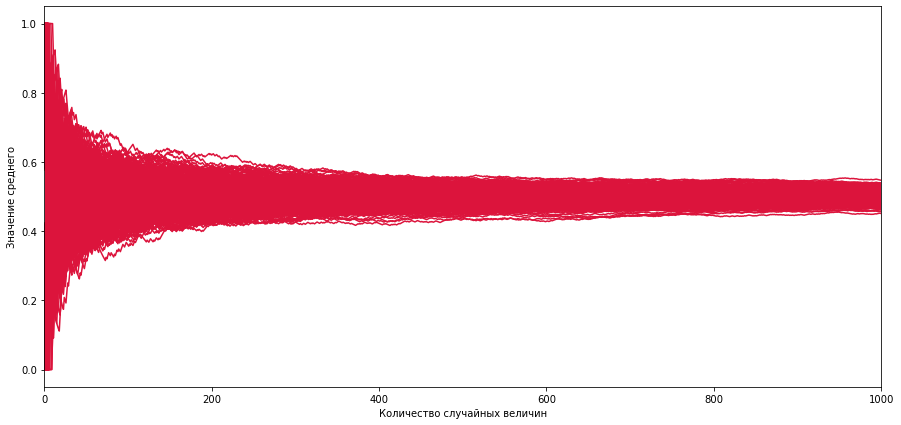

In [18]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

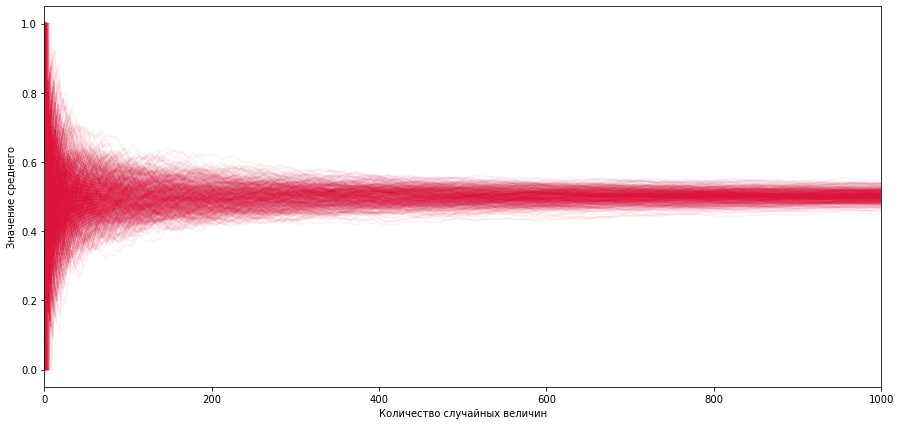

In [19]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще меньше

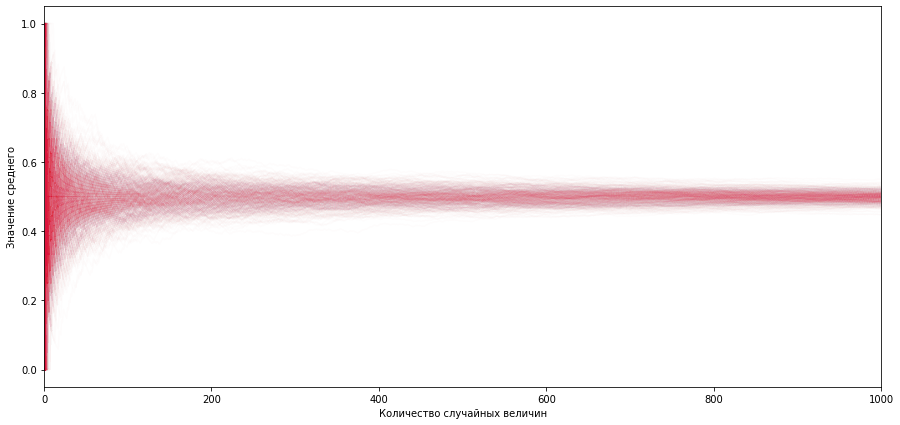

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.


Таким образом, в данном случае выборочное среднее -- "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.


Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-лмбо смысле. О том, какие у оценок бывают "хорошие" свойства -- на следующих занятиях!

## Задание 3
Проведите подобный эксперимент для ядерной оценки плотности. 

Сгенерируйте 100 выборок по 1000 элементов из нормального распределения ($\mu$=0, $\sigma$=1). 

In [171]:
size = 100
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 100)

Отрисуйте их ядерные оценки плотности на одном графике.  На этом же графике отрисуйте плотность искомого распределения

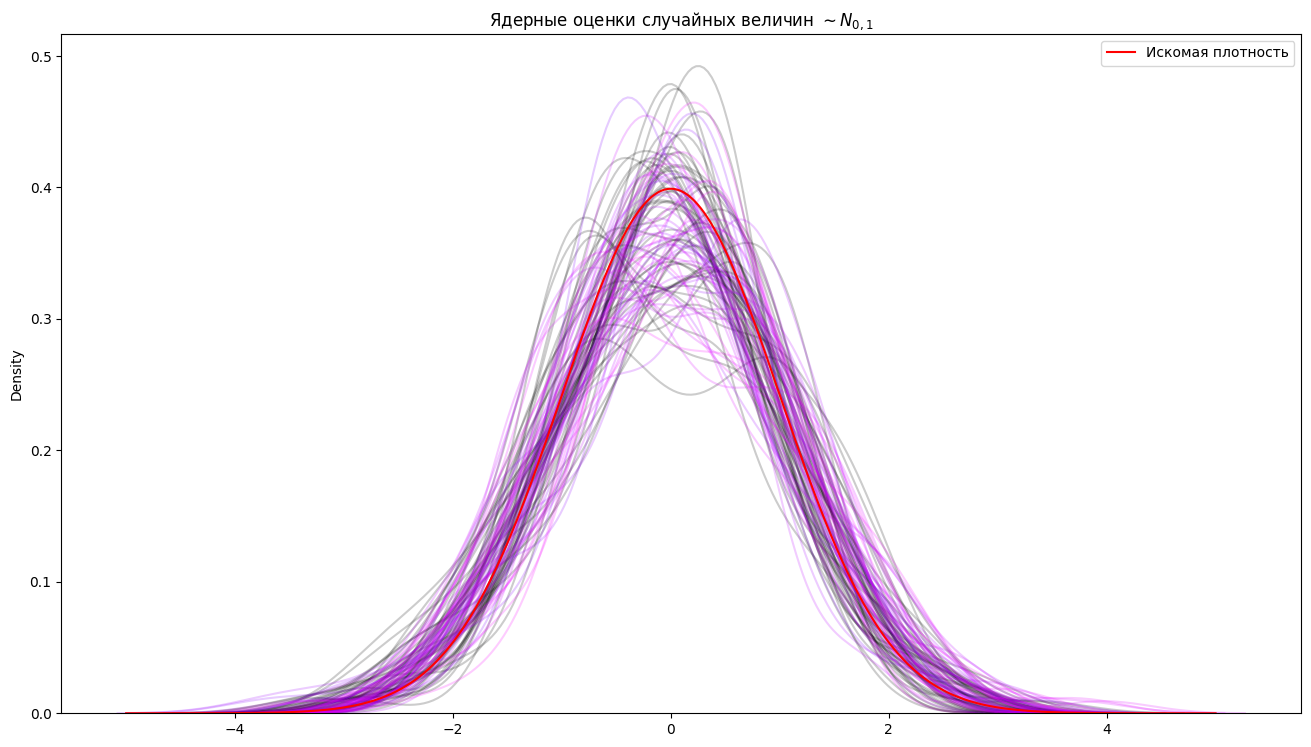

In [173]:
x = np.linspace(-5,5,1000)

fig, ax = plt.subplots(figsize = (16,9), dpi = 100)

for i in range(samples_count):
    sns.kdeplot(sample[i], 
                alpha = 0.2, 
                color = [(i>(samples_count/2))*i/samples_count, 
                         0, 
                         (i<(samples_count//2))*2*i/samples_count + i>(samples_count/2)])

plt.plot(x, sps.norm.pdf(x), label = 'Искомая плотность', color = 'red')
plt.legend()
plt.title(r'Ядерные оценки случайных величин $\sim N_{0,1}$');

Увеличьте размер выборок до 1000 и повторите эксперимент.

In [175]:
size = 1000
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 1000)

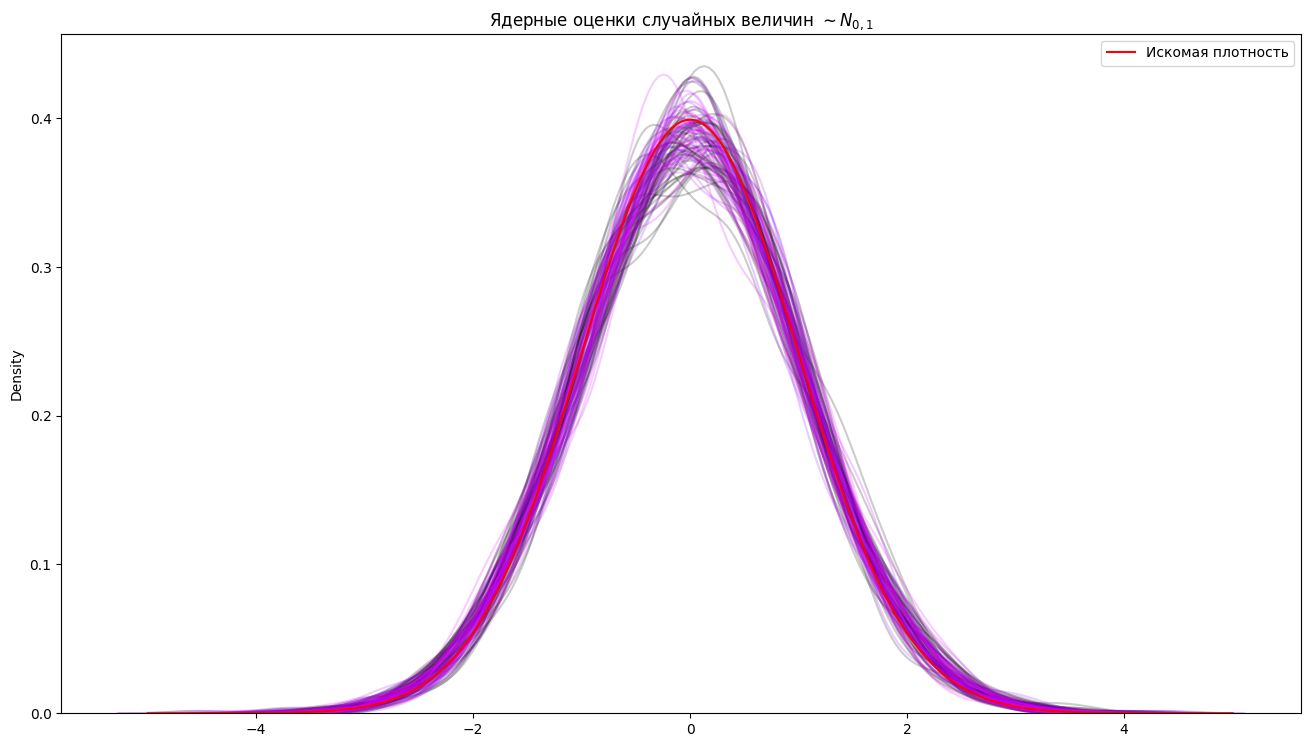

In [176]:
x = np.linspace(-5,5,1000)

fig, ax = plt.subplots(figsize = (16,9), dpi = 100)

for i in range(samples_count):
    sns.kdeplot(sample[i], 
                alpha = 0.2, 
                color = [(i>(samples_count/2))*i/samples_count, 
                         0, 
                         (i<(samples_count//2))*2*i/samples_count + i>(samples_count/2)])

plt.plot(x, sps.norm.pdf(x), label = 'Искомая плотность', color = 'red')
plt.legend()
plt.title(r'Ядерные оценки случайных величин $\sim N_{0,1}$');

А теперь наоборот - поставьте размер выборки 100, а кол-во - 1000 и повторите эксперимент.

In [177]:
size = 100
samples_count = 1000
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(1000, 100)

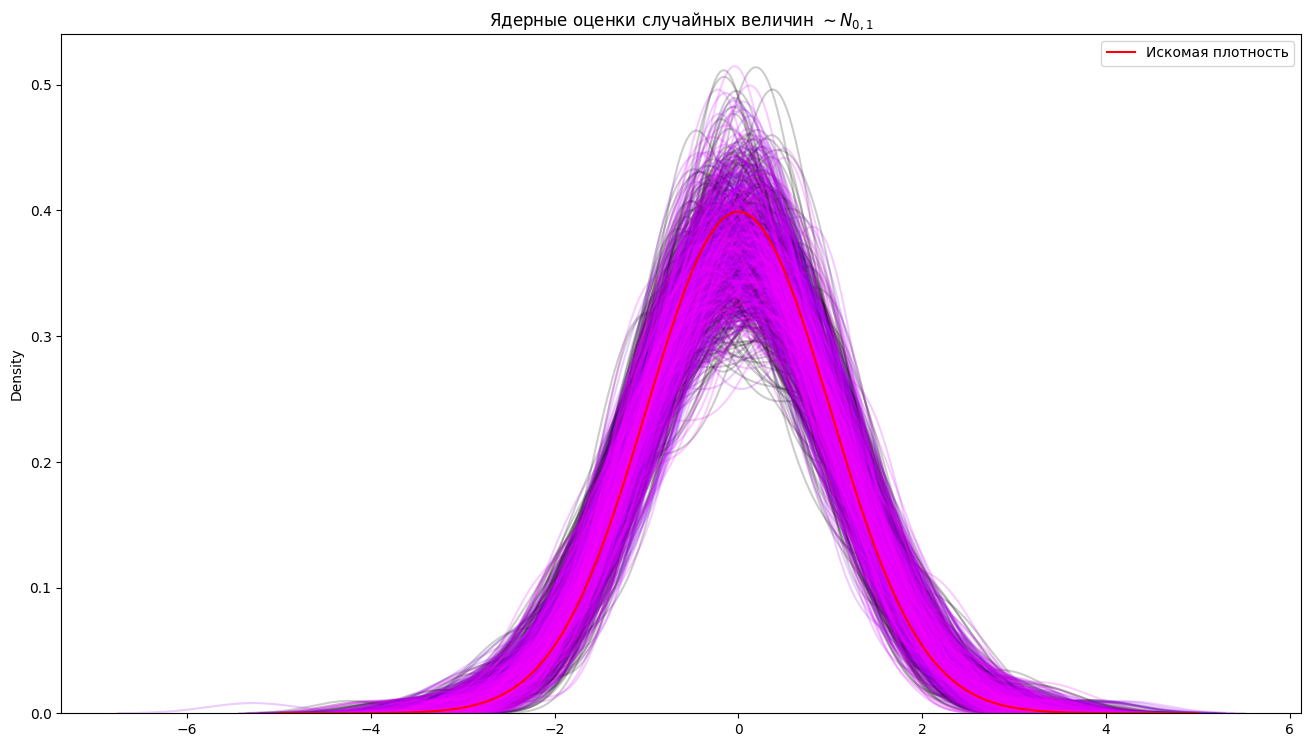

In [178]:
x = np.linspace(-5,5,1000)

fig, ax = plt.subplots(figsize = (16,9), dpi = 100)

for i in range(samples_count):
    sns.kdeplot(sample[i], 
                alpha = 0.2, 
                color = [(i>(samples_count/2))*i/samples_count, 
                         0, 
                         (i<(samples_count//2))*2*i/samples_count + i>(samples_count/2)])

plt.plot(x, sps.norm.pdf(x), label = 'Искомая плотность', color = 'red')
plt.legend()
plt.title(r'Ядерные оценки случайных величин $\sim N_{0,1}$');